# Tratamiento de datos masivos 
## Práctica 1: Análisis de ficheros
### por Rafa Caballero (Facultad de Informática - UCM)


Por favor, no olvides escribir aquí tu nombre

Nombre: 

Vamos a hacer una pequeña gráfica de la evolución de la contaminación atmosférica 
en el día de hoy en Madrid. 

Para ello accederemos al fichero csv que proporciona el ayuntamiento:
    [http://www.mambiente.munimadrid.es/opendata/horario.txt](http://www.mambiente.munimadrid.es/opendata/horario.txt)
    
Este fichero, un csv sin cabecera, cada línea se corresponde a medición de una **estación** para un **contaminante** concreto. En particular, dentro de la línea tenemos que:
    
* La concatenación de los 3 primeros valores nos da la estación concreta. La lista de las estaciones con sus códigos está en [http://www.mambiente.munimadrid.es/opencms/opencms/calaire/SistemaIntegral/SistVigilancia/Estaciones/E04.html] (http://www.mambiente.munimadrid.es/opencms/opencms/calaire/SistemaIntegral/SistVigilancia/Estaciones/E04.html). En nuestro caso nos interesan las líneas que corresponde a Cuatro Caminos,  código '28079038'.
* Los siguientes 3 valores, concatenados, indican el contaminante. Por ejemplo si esta concatenación nos da '013802' corresponde al dióxido de azufre.
* Los siguientes 3 valores indican la fecha con el formato año,mes,dia.
* A apartir de ahí se encuentran otras 48 columnas que deben leerse por pares. El segundo valor es siempre una letra que valdrá 'V' si la medición es la correcta, o 'N' si es incorrecta. La primera pareja corresponde a las 0 horas, la segunda a la una...y así hasta las 23 horas. Como ayuda hay que decir que estos datos empiezan en la columna 9 (contando desde 0).

**Ejemplo**: línea del fichero csv

28,079,038,**01,38,02**,2018,10,01,00004,V,00003,V,00004,V,00004,V,00004,V,00005,V,00005,V,00005,V,00005,V,00006,V,00005,V,00005,V,00005,V,00005,V,00004,V,00004,V,00004,V,00004,V,00004,V,00004,V,00004,V,00004,V,00000,N,00000,N

Se trata de la estación '28079038', contaminante '013802', fecha 2018/10/01. A las 0 horas el valor es 4, a la una 3....y así hasta las 22 horas. Los valores de las 22 y las 23 horas no se pueden tener en cuenta porque están anotados como 'N'.
    
 (Aunque no es necesario para la práctica, podéis encontrar una descripción más detallada del fichero [aquí](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=2ahUKEwiloabbzOfdAhWlJcAKHfefAv8QFjAAegQICRAC&url=https%3A%2F%2Fdatos.madrid.es%2FFWProjects%2Fegob%2FCatalogo%2FMedioAmbiente%2FAire%2FFicheros%2FInterprete_ficheros_%2520calidad_%2520del_%2520aire_global_.pdf&usg=AOvVaw1hj5CQwdUrME4kdrxmnF_K) )

**Paso Inicial**: descargar la información. El siguiente código accede a la página, la baja y la graba en 'c:/hlocal/datos.txt'.

In [1]:
import requests

url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
resp = requests.get(url)
print(resp) # un codigo 200 es que todo ha ido bien.
path = "C:/hlocal/datos.txt"
with open(path, 'wb') as output:  #grabar la página en la carpeta indicada
    output.write(resp.content)

<Response [200]>


**1** Para la estación '28079016', mostrar la lista de todos los contaminantes para los que dispone de sensores. El resultado esperado:
```
064802
070802
080802
120802
140602
```

Nota: 
* Para concatenar strings utilizar +
* Habrá tantos contaminantes como filas corresponden a esta estación

In [2]:
import csv
with open(path) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if row[0]+row[1]+row[2]=='28079016':
            print(row[3]+row[4]+row[5])
        

064802
070802
080802
120802
140602


**2** Determinar cuál el valor más alto para el contaminante
'013802' a las 0 horas. El resultado debe quedar almacenado en la variable 'm'.

Notas:
* Se puede suponer que el valor de las 0 horas, columna 9, siempre existe, no hace falta comprobar que en la columna 10 hay una 'V'.
* El modo más lógico de hacerlo, es crear una lista vacía e ir añadiendo, para cada fila correspondiente a este contaminante, el valor de la columna 9 convertido en entero. Al final, tras acabar la lectura, max(l) (con l la lista) nos dará el valor buscado.
* El valor debe quedar almacenado en la variable m

In [20]:
import csv
l = []
with open(path) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in readCSV:
        a = row[3]+row[4]+row[5]
        if a=='013802':
            l.append(float(row[9]))
        i+=1
m = max(l)
print(m)  # el valor debe ser 16

16.0


**3** Buscar el código de estación a las 0 horas tenía el valor m para 
el contaminante '013802'.

Nota: 
* Si hay varios basta con encontrar el primero
* Se puede asumir que hay al menos una línea para ese contaminante y ese valor
* El resultado se almacenará en la variable 'estacion'
* Si se quiere convertir el resultado de csv.reader a una lista se puede usar
```[Python]
readCSV = list(csv.reader(csvfile, delimiter=','))
```

In [22]:

with open(path) as csvfile:
    readCSV = list(csv.reader(csvfile, delimiter=','))
    found = False
    i = 0
    while not found and i<len(readCSV):
        row = readCSV[i]     
        i += 1
        a = row[3]+row[4]+row[5]
        if a=='013802' and float(row[9])==m:
                estacion = row[0]+row[1]+row[2]
                found = True

if found:
    print(estacion)


28079035


** 4 ** Completar el siguiente código para buscar el código contenido en estación
dentro de las variable 'nombres' y mostrar el nombre de la estación correspondiente.

In [24]:
estacion = '28079004'
nombres = [('28079001','Pº. Recoletos'),
           ('28079002', 'Glta. de Carlos V'),
           ('28079004', 'Plaza de España'),
           ('28079039', 'Barrio del Pilar'),
           ('28079038','Cuatro caminos')
          ]

[y for (x,y) in nombres if  x==estacion][0]

'Plaza de España'

** 5 ** Ahora queremos representar una gráfica con los valores del contaminante
'013802' en la estación de plaza de España, '28079004'.

Para ello se debe recorrer el csv buscando la línea correspondiente. 
Cuando se encuentre se deben rellenar un array con las horas (desde 0 en adelante, 
    hasta el último valor acompañado de 'V') y otro array con los valores asociados. Con estos dos arrays, ambos con datos numéricos y de la misma longtud, podemos llamar a plot, tal y como muestra el código.
    
Nota: recordar que la hora 0 empieza en la columna 9 (contando desde 0), que la columna 10 nos dice si la 9 es válida, etc.

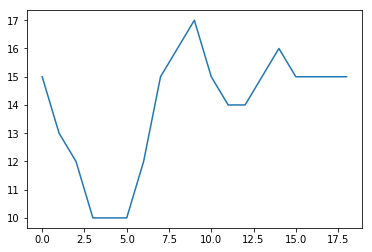

In [25]:
import matplotlib.pyplot as plt
xs = [] # array de horas
ys = [] # array de valores asociados a cada hora

with open(path) as csvfile:
    readCSV = list(csv.reader(csvfile, delimiter=','))
    found = False
    i = 0
    while not found:
        row = readCSV[i]
        i += 1
        a = ''
        for i in range(6):
            a+=row[i]
        
        if a=='28079004013802':
            index = 9
            hora = 0            
            found = True
            while hora<=23 and row[index+1]=='V':
                xs.append( hora)
                ys.append(int(row[index]))
                index += 2
                hora += 1



plt.plot(xs, ys)
plt.show()